In [10]:
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import torch

def plot_images(images, layout='square', layout_size=(), figsize=(16, 16), filename=None):
    h, w, c = images.shape[1:]
    
    if layout == 'square':
        hgrid_size = wgrid_size = math.ceil(np.sqrt(images.shape[0]))
    elif layout == 'rectangle':
        hgrid_size = layout_size[0]
        wgrid_size = layout_size[1]

    images = (images + 1) / 2. * 255.
    images = images.astype(np.uint8)
    images = (images.reshape(hgrid_size, wgrid_size, h, w, c)
              .transpose(0, 2, 1, 3, 4)
              .reshape(hgrid_size*h, wgrid_size*w, c))
    
    plt.figure(figsize=figsize)
    if filename != None:
        plt.imsave(filename, images)
    plt.imshow(images)
    plt.show()

print(torch.cuda.is_available())
print(torch.device('cuda'))
print(torch.cuda.device_count())
print(torch.version.cuda)

True
cuda
3
11.2


## Understand code

### Masks (```./datasets/mask*```)

In [2]:
from datasets import mask_generator_512, mask_generator_256

In [5]:
!python datasets/mask_generator_512.py

datasets/mask_generator_512.py:51: DeprecationWarning: FLIP_LEFT_RIGHT is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.FLIP_LEFT_RIGHT instead.
  mask.transpose(Image.FLIP_LEFT_RIGHT)
datasets/mask_generator_512.py:53: DeprecationWarning: FLIP_TOP_BOTTOM is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.FLIP_TOP_BOTTOM instead.
  mask.transpose(Image.FLIP_TOP_BOTTOM)
0.6009354305267334


In [6]:
!python datasets/mask_generator_512_small.py

datasets/mask_generator_512_small.py:51: DeprecationWarning: FLIP_LEFT_RIGHT is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.FLIP_LEFT_RIGHT instead.
  mask.transpose(Image.FLIP_LEFT_RIGHT)
datasets/mask_generator_512_small.py:53: DeprecationWarning: FLIP_TOP_BOTTOM is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.FLIP_TOP_BOTTOM instead.
  mask.transpose(Image.FLIP_TOP_BOTTOM)


0.7832531871795654


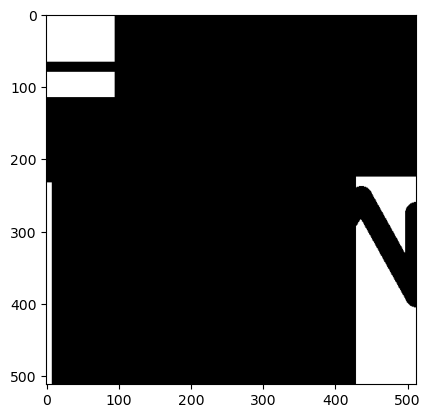

In [8]:
plt.imshow(mask_generator_512.RandomMask(512, [.8, 1])[0], cmap='gray')

### Generate img with stg1 (```./generate_image_having_stg1.py```, FFHQ)

In [37]:
!python generate_image_having_stg1.py \
    --network pretrained/CelebA-HQ_512.pkl \
    --dpath test_sets/CelebA-HQ/images3 \
    --outdir test_sets/CelebA-HQ/samples3 \
    --large-mask False \
    --hole-lrange .1 \
    --hole-rrange .4
    # --seed 99

/root/miniconda3/envs/MAT/lib/python3.7/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: /root/miniconda3/envs/MAT/lib/python3.7/site-packages/torchvision/image.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKSs
  warn(f"Failed to load image Python extension: {e}")
Loading data from: test_sets/CelebA-HQ/images3
Loading networks from: pretrained/CelebA-HQ_512.pkl
Prcessing: 0.png
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
output of D: tensor(-0.8291, device='cuda:0') tensor(-2.2407, device='cuda:0')
Prcessing: 1.png
output of D: tensor(-0.8235, device='cuda:0') tensor(-1.6781, device='cuda:0')
Prcessing: 10.png
output of D: tensor(-0.8146, device='cuda:0') tensor(-1.9778, device='cuda:0')
Prcessing: 11.png
output of D: tensor(-0.7602, device='cuda:0') tensor(-2.5436, device='cuda:0')
Prcessing: 12.png
output of D: tensor(-1.0103, device='cuda:0') tensor(-1.6609, device='

### Visualize (```plot_images(...)```, FFHQ)

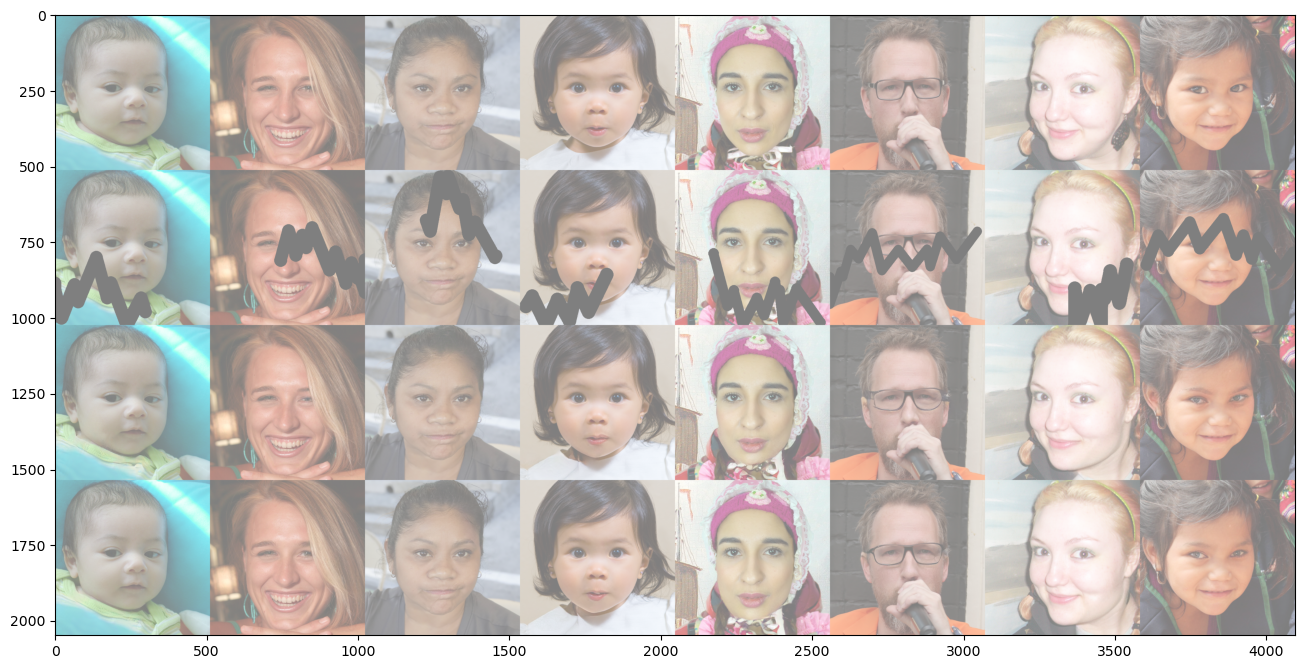

In [38]:
full_imgs = []

for i in range(8):
    full_imgs.append(mpimg.imread('test_sets/CelebA-HQ/images3/' + str(i) + '.png')[..., :-1])
for i in range(8):
    img = mpimg.imread('test_sets/CelebA-HQ/images3/' + str(i) + '.png')[..., :-1]
    mask = mpimg.imread('test_sets/CelebA-HQ/masks3/' + str(i) + '.png')[..., :-1]
    full_imgs.append(img * mask)
for i in range(8):
    full_imgs.append(mpimg.imread('test_sets/CelebA-HQ/samples3_stg1/' + str(i) + '.png'))
for i in range(8):
    full_imgs.append(mpimg.imread('test_sets/CelebA-HQ/samples3/' + str(i) + '.png'))

plot_images(np.array(full_imgs), 'rectangle', (4, 8))

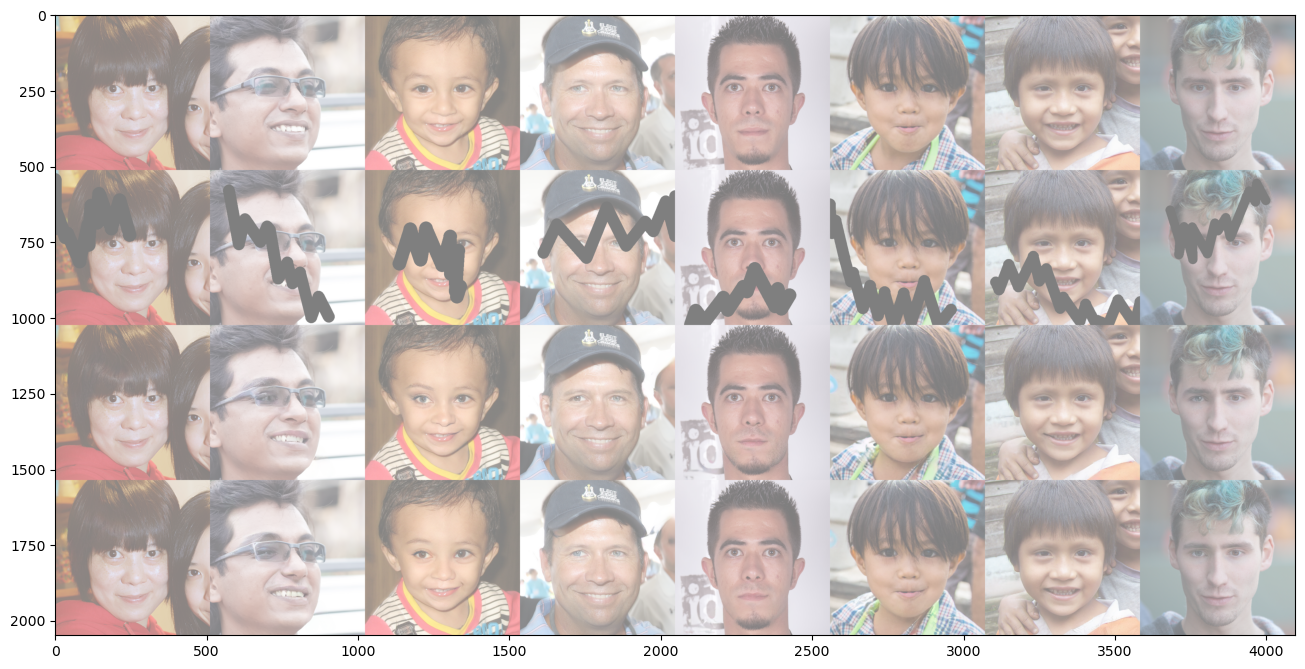

In [39]:
full_imgs = []

for i in range(8, 16):
    full_imgs.append(mpimg.imread('test_sets/CelebA-HQ/images3/' + str(i) + '.png')[..., :-1])
for i in range(8, 16):
    img = mpimg.imread('test_sets/CelebA-HQ/images3/' + str(i) + '.png')[..., :-1]
    mask = mpimg.imread('test_sets/CelebA-HQ/masks3/' + str(i) + '.png')[..., :-1]
    full_imgs.append(img * mask)
for i in range(8, 16):
    full_imgs.append(mpimg.imread('test_sets/CelebA-HQ/samples3_stg1/' + str(i) + '.png'))
for i in range(8, 16):
    full_imgs.append(mpimg.imread('test_sets/CelebA-HQ/samples3/' + str(i) + '.png'))

plot_images(np.array(full_imgs), 'rectangle', (4, 8))

### Eval (```./evaluation/*```, FFHQ)

In [40]:
from evaluation import cal_fid_pids_uids, cal_lpips, cal_psnr_ssim_l1
import contextlib

In [41]:
with contextlib.redirect_stdout(None):
    fid1, pids1, uids1 = cal_fid_pids_uids.calculate_metrics('test_sets/CelebA-HQ/samples3_stg1/', 'test_sets/CelebA-HQ/images3/')
    lpips1 = cal_lpips.calculate_metrics('test_sets/CelebA-HQ/samples3_stg1/', 'test_sets/CelebA-HQ/images3/')
    psnr1, ssim1, l11 = cal_psnr_ssim_l1.calculate_metrics('test_sets/CelebA-HQ/samples3_stg1/', 'test_sets/CelebA-HQ/images3/')

/root/miniconda3/envs/MAT/lib/python3.7/site-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/root/miniconda3/envs/MAT/lib/python3.7/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [42]:
with contextlib.redirect_stdout(None):
    fid, pids, uids = cal_fid_pids_uids.calculate_metrics('test_sets/CelebA-HQ/samples3/', 'test_sets/CelebA-HQ/images3/')
    lpips = cal_lpips.calculate_metrics('test_sets/CelebA-HQ/samples3/', 'test_sets/CelebA-HQ/images3/')
    psnr, ssim, l1 = cal_psnr_ssim_l1.calculate_metrics('test_sets/CelebA-HQ/samples3/', 'test_sets/CelebA-HQ/images3/')

/root/miniconda3/envs/MAT/lib/python3.7/site-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/root/miniconda3/envs/MAT/lib/python3.7/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [43]:
print('fid stg1:', fid1)
print('pids stg1:', pids1)
print('uids stg1:', uids1)
print('lpips stg1:', lpips1)
print('psnr stg1:', psnr1)
print('ssim stg1:', ssim1)
print('l1 stg1:', l11)
print()
print('fid:', fid)
print('pids:', pids)
print('uids:', uids)
print('lpips:', lpips)
print('psnr:', psnr)
print('ssim:', ssim)
print('l1:', l1)

fid stg1: 21.44343529455714
pids stg1: 0.0
uids stg1: 0.0
lpips stg1: 0.038641468272544444
psnr stg1: 28.897178271042968
ssim stg1: 0.950444168580243
l1 stg1: 0.008142952825508866

fid: 15.66922241682901
pids: 0.0
uids: 0.0
lpips: 0.03240616316907108
psnr: 29.543609260752
ssim: 0.9537146534574072
l1: 0.007374091865190494


### Eval (External Img)

In [65]:
!python generate_image.py --network pretrained/CelebA-HQ_512.pkl --dpath test_sets/CelebA-HQ/images4 --outdir test_sets/CelebA-HQ/samples4

/root/miniconda3/envs/MAT/lib/python3.7/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: /root/miniconda3/envs/MAT/lib/python3.7/site-packages/torchvision/image.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKSs
  warn(f"Failed to load image Python extension: {e}")
Loading data from: test_sets/CelebA-HQ/images4
Loading networks from: pretrained/CelebA-HQ_512.pkl
Prcessing: 0.png
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
Prcessing: 1.png
Prcessing: 10.png
Prcessing: 11.png
Prcessing: 12.png
Prcessing: 13.png
Prcessing: 14.png
Prcessing: 15.png
Prcessing: 2.png
Prcessing: 3.png
Prcessing: 4.png
Prcessing: 5.png
Prcessing: 6.png
Prcessing: 7.png
Prcessing: 8.png
Prcessing: 9.png


In [72]:
for i in range(16):
    print(mpimg.imread('test_sets/CelebA-HQ/samples4/' + str(0) + '.png').shape)

(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)


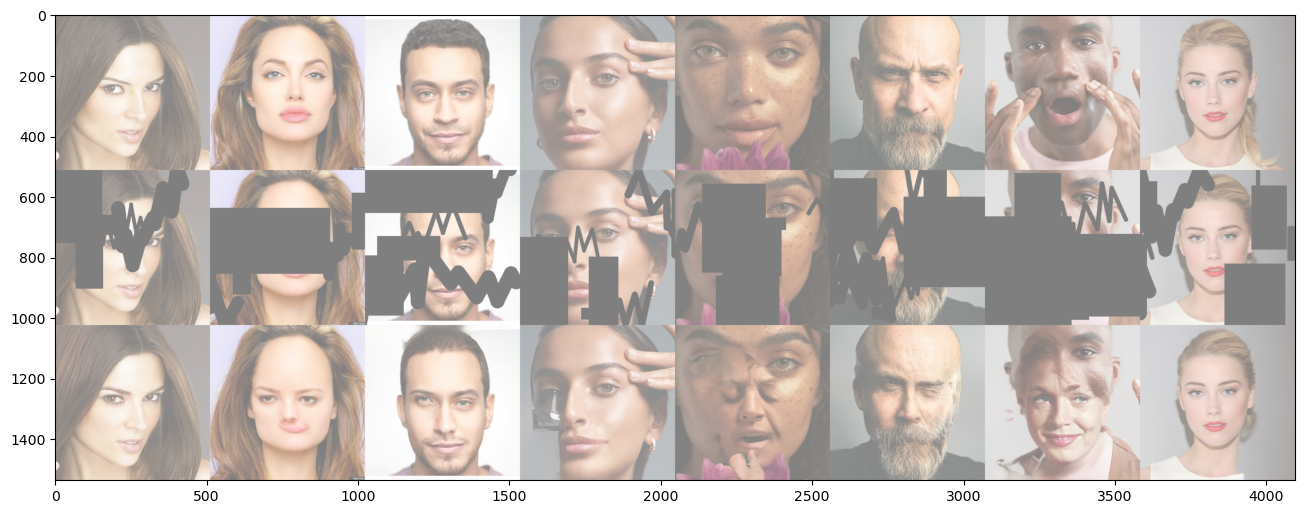

In [86]:
full_imgs = []

for i in range(8):
    full_imgs.append(mpimg.imread('test_sets/CelebA-HQ/images4/' + str(i) + '.jpg') / 255)
for i in range(8):
    img = mpimg.imread('test_sets/CelebA-HQ/images4/' + str(i) + '.jpg') / 255
    mask = mpimg.imread('test_sets/CelebA-HQ/masks4/' + str(i) + '.jpg') / 255
    full_imgs.append(img * mask)
for i in range(8):
    full_imgs.append(mpimg.imread('test_sets/CelebA-HQ/samples4/' + str(i) + '.png'))

plot_images(np.array(full_imgs), 'rectangle', (3, 8))

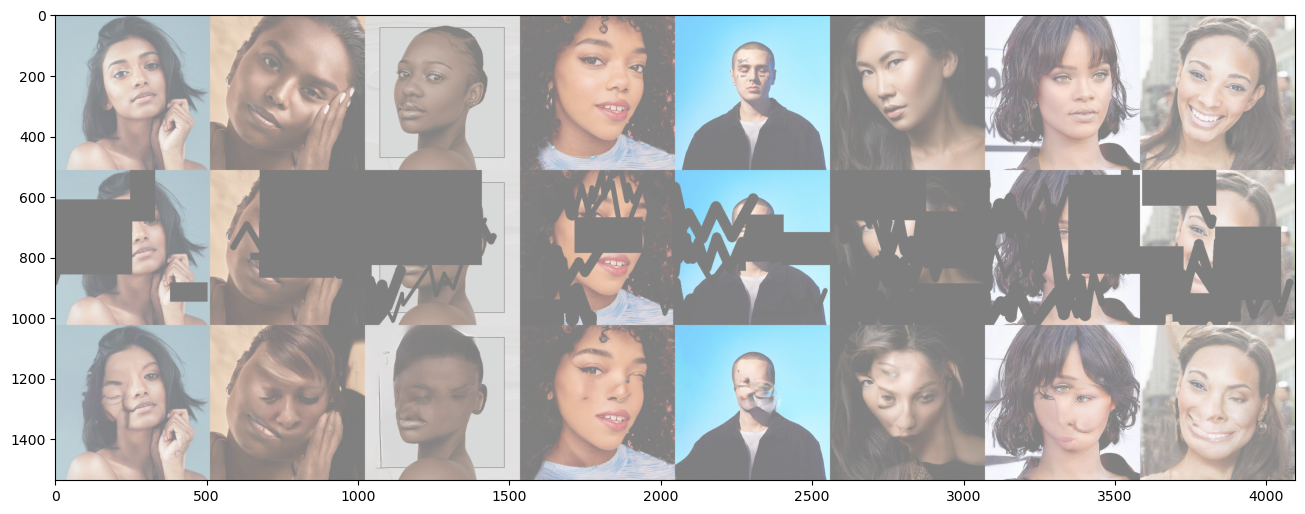

In [87]:
full_imgs = []

for i in range(8, 16):
    full_imgs.append(mpimg.imread('test_sets/CelebA-HQ/images4/' + str(i) + '.jpg') / 255)
for i in range(8, 16):
    img = mpimg.imread('test_sets/CelebA-HQ/images4/' + str(i) + '.jpg') / 255
    mask = mpimg.imread('test_sets/CelebA-HQ/masks4/' + str(i) + '.jpg') / 255
    full_imgs.append(img * mask)
for i in range(8, 16):
    full_imgs.append(mpimg.imread('test_sets/CelebA-HQ/samples4/' + str(i) + '.png'))

plot_images(np.array(full_imgs), 'rectangle', (3, 8))

In [88]:
with contextlib.redirect_stdout(None):
    fid, pids, uids = cal_fid_pids_uids.calculate_metrics('test_sets/CelebA-HQ/samples4/', 'test_sets/CelebA-HQ/images4/')
    lpips = cal_lpips.calculate_metrics('test_sets/CelebA-HQ/samples4/', 'test_sets/CelebA-HQ/images4/')
    psnr, ssim, l1 = cal_psnr_ssim_l1.calculate_metrics('test_sets/CelebA-HQ/samples4/', 'test_sets/CelebA-HQ/images4/')

print('fid:', fid)
print('pids:', pids)
print('uids:', uids)
print('lpips:', lpips)
print('psnr:', psnr)
print('ssim:', ssim)
print('l1:', l1)

/root/miniconda3/envs/MAT/lib/python3.7/site-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/root/miniconda3/envs/MAT/lib/python3.7/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


fid: 80.14980693590904
pids: 0.0
uids: 0.0
lpips: 0.2172195720486343
psnr: 18.657231375521494
ssim: 0.7608027625772177
l1: 0.0609041665893754


### Training Results

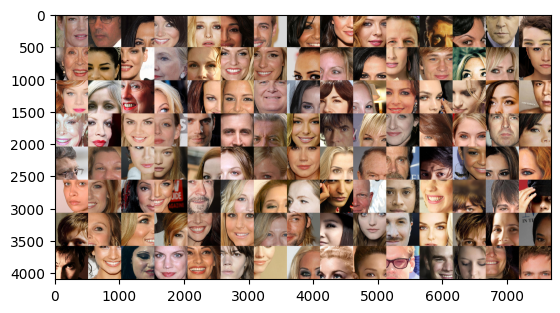

In [10]:
plt.imshow(mpimg.imread('saved_model/00019-CelebA-HQ-img-mirror-celeba512-mat-lr0.001-TwoStageLoss-pr0.1-nopl-batch8-tc0.5-sm0.5-ema10-noaug/reals.png'))

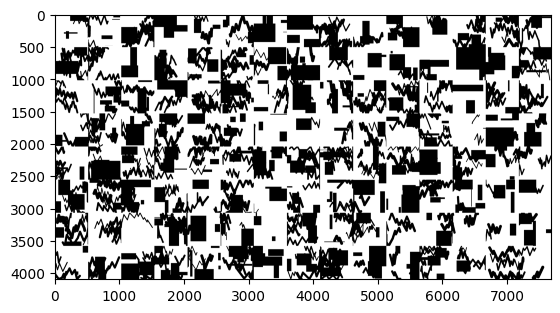

In [11]:
plt.imshow(mpimg.imread('saved_model/00019-CelebA-HQ-img-mirror-celeba512-mat-lr0.001-TwoStageLoss-pr0.1-nopl-batch8-tc0.5-sm0.5-ema10-noaug/masks.png'), cmap='gray')

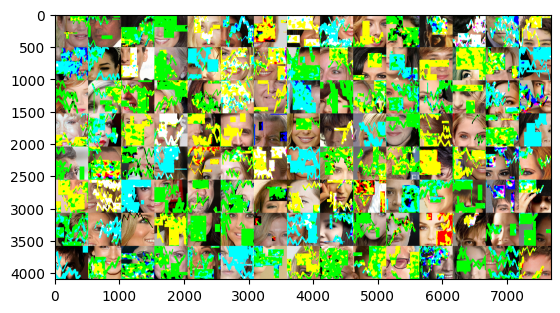

In [8]:
plt.imshow(mpimg.imread('saved_model/00019-CelebA-HQ-img-mirror-celeba512-mat-lr0.001-TwoStageLoss-pr0.1-nopl-batch8-tc0.5-sm0.5-ema10-noaug/fakes_init.png'))

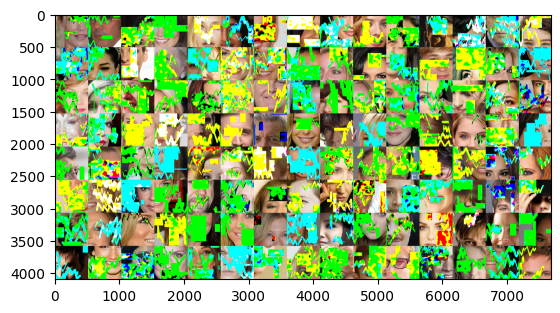

In [6]:
plt.imshow(mpimg.imread('saved_model/00019-CelebA-HQ-img-mirror-celeba512-mat-lr0.001-TwoStageLoss-pr0.1-nopl-batch8-tc0.5-sm0.5-ema10-noaug/fakes000000.png'))

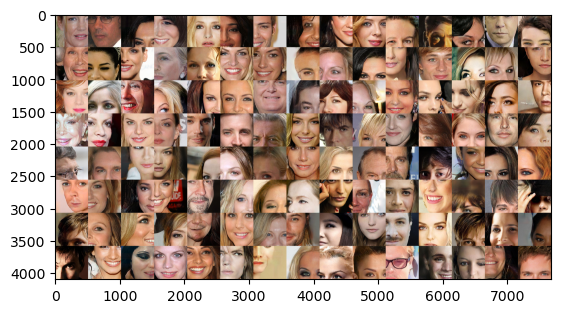

In [44]:
plt.imshow(mpimg.imread('saved_model/00019-CelebA-HQ-img-mirror-celeba512-mat-lr0.001-TwoStageLoss-pr0.1-nopl-batch8-tc0.5-sm0.5-ema10-noaug/fakes000320.png'))